In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Pull OHLCV data for BTC-USD from Yahoo Finance for the last 500 days
btc_data = yf.download('BTC-USD', period='500d')

# Ensure there's no missing data
btc_data.dropna(inplace=True)
btc_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-16,30315.976562,30555.537109,30157.832031,30315.355469,30315.355469,12854816417
2023-04-17,30317.146484,30319.197266,29275.371094,29445.044922,29445.044922,17872186762
2023-04-18,29449.091797,30470.302734,29154.849609,30397.552734,30397.552734,19480529496
2023-04-19,30394.187500,30411.054688,28669.898438,28822.679688,28822.679688,24571565421
2023-04-20,28823.683594,29076.400391,28037.257812,28245.988281,28245.988281,21340360360
...,...,...,...,...,...,...
2024-08-23,60380.953125,64947.062500,60372.050781,64094.355469,64094.355469,42530509233
2024-08-24,64103.871094,64513.789062,63619.917969,64178.992188,64178.992188,21430585163
2024-08-25,64176.367188,64996.421875,63833.519531,64333.542969,64333.542969,18827683555


In [6]:
# Step 2: Define the independent variable (Day Index) and dependent variable (Close Price)
btc_data['Day_Index'] = np.arange(len(btc_data))
X = btc_data[['Day_Index']]
y = btc_data['Close']


In [7]:
# Step 3: Train the linear regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [10]:
# Step 4: Calculate the predicted prices (regression line)
btc_data['Predicted_Close'] = model.predict(X)


In [12]:
# Step 5: Calculate the residuals (errors)
btc_data['Residual'] = btc_data['Close'] - btc_data['Predicted_Close']

In [13]:
# Step 6: Calculate the standard deviation of the residuals
std_dev = np.std(btc_data['Residual'])



6928.61085864297

In [14]:
# Step 7: Calculate the upper and lower bands (2 standard deviations)
btc_data['Upper_Band'] = btc_data['Predicted_Close'] + 2 * std_dev
btc_data['Lower_Band'] = btc_data['Predicted_Close'] - 2 * std_dev

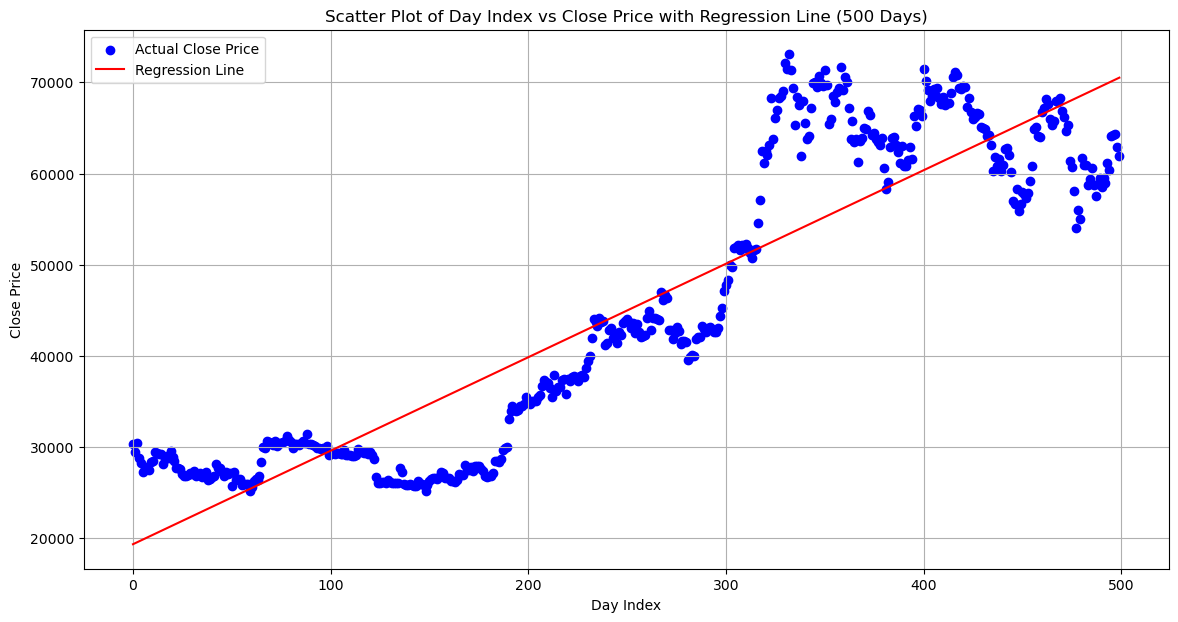

In [15]:
# Step 8: Plot the scatter plot of Day Index vs Close and the regression line
plt.figure(figsize=(14, 7))
plt.scatter(btc_data['Day_Index'], btc_data['Close'], color='blue', label='Actual Close Price')
plt.plot(btc_data['Day_Index'], btc_data['Predicted_Close'], color='red', label='Regression Line')
plt.xlabel('Day Index')
plt.ylabel('Close Price')
plt.title('Scatter Plot of Day Index vs Close Price with Regression Line (500 Days)')
plt.legend()
plt.grid(True)
plt.show()

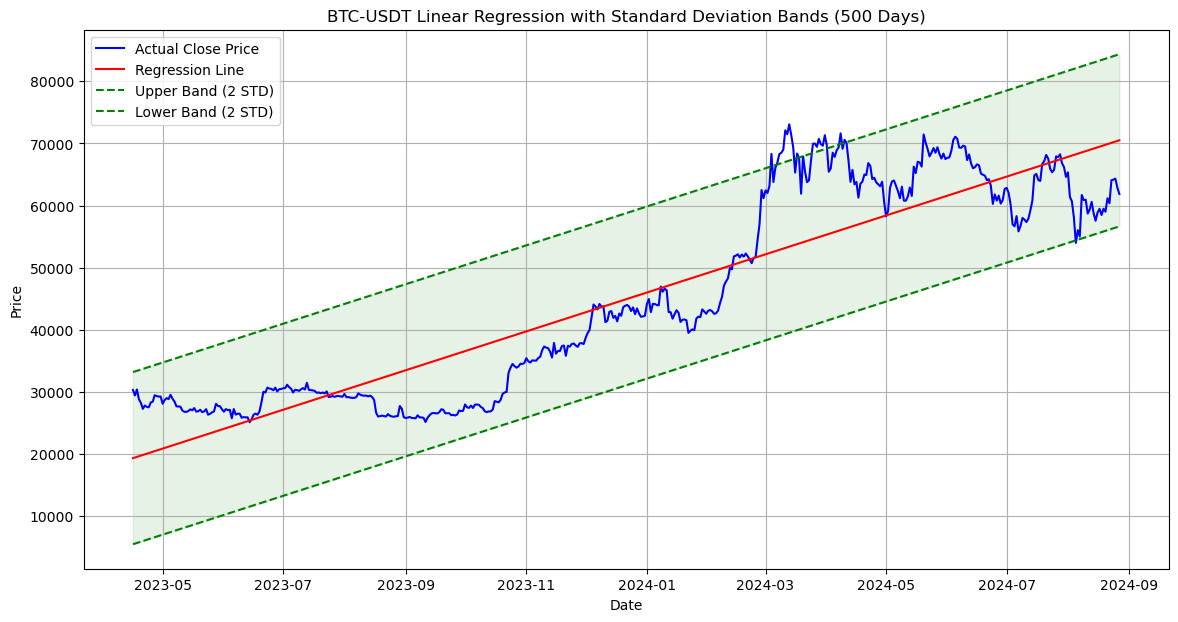

In [16]:
# Step 9: Plot the closing price, regression line, and standard deviation bands
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data['Close'], label='Actual Close Price', color='blue')
plt.plot(btc_data.index, btc_data['Predicted_Close'], label='Regression Line', color='red')
plt.plot(btc_data.index, btc_data['Upper_Band'], label='Upper Band (2 STD)', linestyle='--', color='green')
plt.plot(btc_data.index, btc_data['Lower_Band'], label='Lower Band (2 STD)', linestyle='--', color='green')
plt.fill_between(btc_data.index, btc_data['Upper_Band'], btc_data['Lower_Band'], color='green', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BTC-USDT Linear Regression with Standard Deviation Bands (500 Days)')
plt.legend()
plt.grid(True)
plt.show()
